The below program walks through some differences between PCA and t-SNE for dimension reduction. 

### PCA
Principal Component Analysis or PCA is a linear feature extraction technique. It performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. It does so by calculating the eigenvectors from the covariance matrix. The eigenvectors that correspond to the largest eigenvalues (the principal components) are used to reconstruct a significant fraction of the variance of the original data.

In simpler terms, PCA combines your input features in a specific way that you can drop the least important feature while still retaining the most valuable parts of all of the features. As an added benefit, each of the new features or components created after PCA are all independent of one another.

### t-SNE
Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. It is extensively applied in image processing, NLP, genomic data and speech processing.

t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

In this way, t-SNE maps the multi-dimensional data to a lower dimensional space and attempts to find patterns in the data by identifying observed clusters based on similarity of data points with multiple features. However, after this process, the input features are no longer identifiable, and you cannot make any inference based only on the output of t-SNE. Hence it is mainly a data exploration and visualization technique.

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 23

In [3]:
# import mnist fashion dataset
from keras.datasets import fashion_mnist

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [4]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 10s 2us/step


In [25]:
testX.shape

(10000, 28, 28)

In [26]:
# reshape to 2 dimension array
trainX = trainX.reshape(60000, 784)
testX = testX.reshape(10000, 784)

In [27]:
trainY.shape

(60000,)

In [9]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [28]:
# Subset first 20k data points to visualize
x_subset = trainX[0:20000]
y_subset = trainY[0:20000]

## run pca with 4 components and default settings

In [29]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.6105551719665527 seconds


In [31]:
# store principal components in pca_df and check amount of variance explained by each
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.29021329 0.1778743  0.06015076 0.04975864]


(<Figure size 576x576 with 1 Axes>,
 [Text(774.4497664228124, -689.6949155519727, '0'),
  Text(42.86381925992095, -1429.3643908369077, '1'),
  Text(1098.2843326495404, 376.9753232922914, '2'),
  Text(329.2719860683725, -1111.489809112175, '3'),
  Text(1266.970986825622, 295.4662008371466, '4'),
  Text(-1589.5573233919868, 61.86773396068656, '5'),
  Text(713.4727983677597, -65.68701122641653, '6'),
  Text(-1521.4109429503415, 335.6656253053223, '7'),
  Text(63.817681716854864, 1003.3250404677839, '8'),
  Text(-645.6906091267322, 1168.2384039030903, '9')])

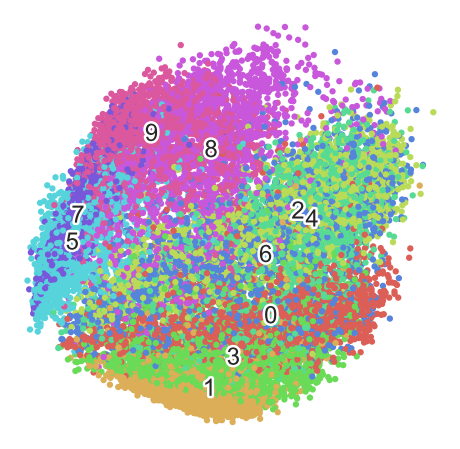

In [32]:
# take first two principal components and visualize
top_two_comp = pca_df[['pca1','pca2']]
fashion_scatter(top_two_comp.values,y_subset)

PCA had created 9 different clusters based on the data points however there seems to be a good amount of overlap between the clusters so this may not be optimal.

## run t-SNE with default parameters

In [33]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 807.3443598747253 seconds


Note: t-SNE takes a much longer time to run on the exact same dataset as PCA

(<Figure size 576x576 with 1 Axes>,
 [Text(28.53774, -0.4758361, '0'),
  Text(59.76284, -27.278257, '1'),
  Text(-39.08052, 1.4122739, '2'),
  Text(18.355886, -39.209885, '3'),
  Text(-34.868805, -10.446362, '4'),
  Text(-2.4272642, 33.62139, '5'),
  Text(-13.460896, -4.9174585, '6'),
  Text(-21.667515, 55.53529, '7'),
  Text(-24.07303, -58.01581, '8'),
  Text(33.379837, 46.383118, '9')])

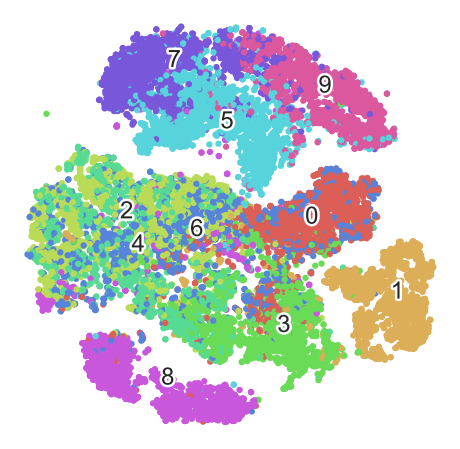

In [34]:
# visualize output of t-SNE
fashion_scatter(fashion_tsne, y_subset)

We see definite improvement from PCA. The clusters are more neatly formed with less overlap.

## run PCA as inputs for t-SNE

Scikit-learn's documentation of t-SNE explicitly states that:

It is highly recommended to use another dimensionality reduction method (e.g., PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g., 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples.

In [35]:
# first run PCA for 50 principal components to act as initial reducer
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 1.3927271366119385 seconds
Cumulative variance explained by 50 principal components: 0.8625155910516057


In [36]:
# now run t-SNE on PCA output (pca_result_50)
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 190.87401008605957 seconds


This definitely took less time than the initial t-SNE run due to the initial PCA run

(<Figure size 576x576 with 1 Axes>,
 [Text(10.814735, -51.16687, '0'),
  Text(58.698517, -16.991169, '1'),
  Text(-37.325417, -1.542559, '2'),
  Text(19.572918, -11.88097, '3'),
  Text(-26.288088, 9.588744, '4'),
  Text(7.0486813, 43.450058, '5'),
  Text(-20.43821, -19.863049, '6'),
  Text(-17.822798, 52.622437, '7'),
  Text(-40.951702, -48.888077, '8'),
  Text(44.368847, 41.136032, '9')])

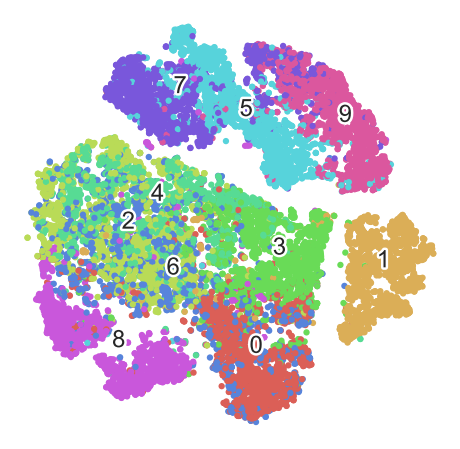

In [37]:
fashion_scatter(fashion_pca_tsne, y_subset)

Pretty similar to our original t-SNE run with only a slight improvement from cluster 3 maybe. 

## t-SNE vs. PCA conclusions

Although both PCA and t-SNE have their own advantages and disadvantages, some key differences between PCA and t-SNE can be noted as follows:

t-SNE is computationally expensive and can take several hours on million-sample datasets where PCA will finish in seconds or minutes.

PCA it is a mathematical technique, but t-SNE is a probabilistic one.

Linear dimensionality reduction algorithms, like PCA, concentrate on placing dissimilar data points far apart in a lower dimension representation. But in order to represent high dimension data on low dimension, non-linear manifold, it is essential that similar data points must be represented close together, which is something t-SNE does not PCA.

Sometimes in t-SNE different runs with the same hyperparameters may produce different results hence multiple plots must be observed before making any assessment with t-SNE, while this is not the case with PCA.

Since PCA is a linear algorithm, it will not be able to interpret the complex polynomial relationship between features while t-SNE is made to capture exactly that.
Conclusion